# Theory $\rightarrow$ Python

## Turtlebot

We represent the **turtlebot block** as a dynamical system. The plant state vector $\mathbf{x}$ and input vector $\mathbf{u}$ are given by

$$
\mathbf{x} =
\begin{bmatrix}
x \\ 
y \\
\theta
\end{bmatrix},
\qquad  
\mathbf{u} =
\begin{bmatrix}
v \\ 
\omega
\end{bmatrix}.
$$

where  
- $x$ is the horizontal component of position,  
- $y$ is the vertical component of position,  
- $\theta$ is the angular displacement of the turtlebot heading w.r.t. the $+x$ axis (positive counterclockwise).  

and  
- $v$ is the commanded linear velocity,  
- $\omega$ is the commanded angular velocity.  

The turtlebot follows the standard unicycle kinematic model, so the dynamics are

$$
\dot{\mathbf{x}} = f(\mathbf{x}, \mathbf{u}) =
\begin{bmatrix}
v \cos\theta \\ 
v \sin\theta \\
\omega
\end{bmatrix}.
$$

We define the output function as the identity map, i.e.,

$$
\mathbf{y} = h(\mathbf{x}) = \mathbf{x}.
$$

Thus, the dynamical system is

$$
\dot{\mathbf{x}} = f(\mathbf{x}, \mathbf{u}) =
\begin{bmatrix}
v \cos\theta \\ 
v \sin\theta \\
\omega
\end{bmatrix},
\qquad
\mathbf{y} = h(\mathbf{x}) = \mathbf{x}.
$$

In [8]:
import numpy as np
from numpy.typing import NDArray
from pykal.block_dynamical_system import BlockDynamicalSystem as BlockDS

def f_tb(xk:NDArray, uk:NDArray) -> NDArray:
    _,_,th = float(xk[0]),float(xk[1]),float(xk[2])
    v,w = float(uk[0]), float(uk[1])

    xdot, ydot, thdot = v * np.cos(th), v * np.sin(th), w
    xkdot = np.atleast_2d([xdot,ydot,thdot])

    return xkdot.T

def h_tb(xk:NDArray):
    return xk

def Q_tb(xk:NDArray) -> NDArray:
    return np.eye(3) * 1e-5

def R_tb(xk:NDArray) -> NDArray:
    return np.eye(3) * 1e-3

turtlebot_block = BlockDS(f = f_tb, h= h_tb,Q=Q_tb,R=R_tb,sys_type="cti") 
turtlebot_block.__dict__


{'_X': [],
 '_Y': [],
 '_f': <function __main__.f_tb(xk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]], uk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]>,
 '_h': <function __main__.h_tb(xk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]])>,
 '_Q': <function __main__.Q_tb(xk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]>,
 '_R': <function __main__.R_tb(xk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]>,
 '_sys_type': 'cti'}

## KF

We implement the Kalman Filter (KF)  as a discrete-time dynamical system. This KF has its own internal **kf state** consisting of the estimated state of the turtlebot $\hat{\mathbf{x}}_{\text{turtle}}$ and the error covariance $P$:

$$
\mathbf{x}_{\text{kf}} =
\begin{bmatrix}
\hat{\mathbf{x}}_{\text{turtle}} \\
P
\end{bmatrix}.
$$

The dynamics evolve in discrete time according to the map

$$
\mathbf{x}_{k+1} = f_{\text{kf}}(\mathbf{x}_k, \mathbf{u}_k, \mathbf{y}_{k+1}, \text{dt},f_{\text{tb}},F_{\text{tb}},h_{\text{tb}},H_{\text{tb}}, Q_{\text{tb}},R_{\text{tb}},\text{systype}_{\text{tb}}),
$$

The output function simply extracts the estimated state of the turtlebot ie.

$$
\mathbf{y}_{kf}(\mathbf{x}_{\text{kf}} ) = \hat{\mathbf{x}}_{\text{turtle}}.
$$


In [9]:
from pykal.state_estimators.kf import KF
kf_block = BlockDS(f=KF.kf_f,h=KF.kf_h,sys_type="dti")
kf_block.__dict__

{'_X': [],
 '_Y': [],
 '_f': <function pykal.state_estimators.kf.KF.kf_f(xk: Tuple[numpy.ndarray[tuple[Any, ...], numpy.dtype[~_ScalarT]], numpy.ndarray[tuple[Any, ...], numpy.dtype[~_ScalarT]]], tk: float, *, yk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]], dt: float, f: Callable, F: Callable, Q: Callable, h: Callable, H: Callable, R: Callable, f_sys_type: str, param_params: Optional[Dict] = None) -> Tuple[numpy.ndarray[tuple[Any, ...], numpy.dtype[~_ScalarT]], numpy.ndarray[tuple[Any, ...], numpy.dtype[~_ScalarT]]]>,
 '_h': <function pykal.state_estimators.kf.KF.kf_h(xk: Tuple[numpy.ndarray[tuple[Any, ...], numpy.dtype[~_ScalarT]], numpy.ndarray[tuple[Any, ...], numpy.dtype[~_ScalarT]]]) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]>,
 '_Q': None,
 '_R': None,
 '_sys_type': 'dti'}

## Signal Block

Nothing to see here, folks. Just a humble $h$ function that generates a signal over time. What kind of signal? Perhaps we'll see later

In [10]:
from pykal.demo import straight_loop_straight
# if f is not initialized, it defaults to the zero dynamics
signal_block = BlockDS(h=straight_loop_straight) 
signal_block.__dict__

{'_X': [],
 '_Y': [],
 '_f': <function pykal.block_dynamical_system.BlockDynamicalSystem.__init__.<locals>.zero_dynamics(xk: numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]>,
 '_h': <function pykal.demo.straight_loop_straight(tk: float) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[~_ScalarT]]>,
 '_Q': None,
 '_R': None,
 '_sys_type': None}

## Simulating General Dynamical Systems in Python

In [11]:
from pykal.compute import Simulation

### Simulation Time

dt = 0.1                    # time step of simulation
t_span = np.arange(0,40,dt) # time span of simulation

### Initial Conditions 
 
# turtlebot
xk_tur = np.asarray([0,0,0]) # at origin, facing +x direction

# kf
Pk = np.array([[0.1, 0, 0],
               [0, 0.1, 0],
               [0, 0, 0.1]], dtype=float)
xk_kf = [xk_tur,Pk]

### Initialize State Memory
kf_block.X = [xk_kf]
turtlebot_block.Y = [] 

### Random Seed
rng = np.random.default_rng(42)

### Jacobians for kf block
def F_tb(xk: NDArray, uk: NDArray, dt: float) -> NDArray:
    v = float(uk[0])
    th = float(xk[2])
    return np.array([[1,0,-dt*v*np.sin(th)],
                     [0,1, dt*v*np.cos(th)],
                     [0,0, 1]])

def H_tb(xk:NDArray):
    return np.eye(xk.shape[0])


### Simulation
for tk in t_span:
    # kinematic model input
    uk = Simulation.of_dynamical_system_block(block = signal_block,
                                              tk_in_sim=tk,dt=dt)
    # turtlebot dynamics
    xk_tur,yk_tur = Simulation.of_dynamical_system_block(block = turtlebot_block,
                                                 x0=xk_tur,tk_in_sim=tk,
                                                 dt=0.1, rng=rng,
                                                 func_params={
                                                     "f":{"uk":uk}
                                                              })
    xk_kf = kf_block.X[-1]
    xk_kf, yk_kf = Simulation.of_dynamical_system_block(
                                block=kf_block,
                                x0=xk_kf,
                                tk_in_sim=tk,
                                dt=dt,
                                func_params={
                                    "f_kf": {"yk": yk_tur,"uk": uk,"dt": dt,"f": f_tb,"F": F_tb,"h": h_tb,"H": H_tb,"Q": Q_tb,"R": R_tb,"f_sys_type": "cti",
                                    },
                                    },
                                param_params=
                                {"xk": yk_tur,"uk":uk,"dt":dt},
                                    )
    kf_block.X.append(xk_kf)
    turtlebot_block.X.append(xk_tur)
    turtlebot_block.Y.append(yk_tur)


/tmp/ipykernel_18954/3197596468.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v,w = float(uk[0]), float(uk[1])
/tmp/ipykernel_18954/2698468117.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(uk[0])


<Axes: title={'center': '2D Trajectory measurements'}, xlabel='x', ylabel='y'>

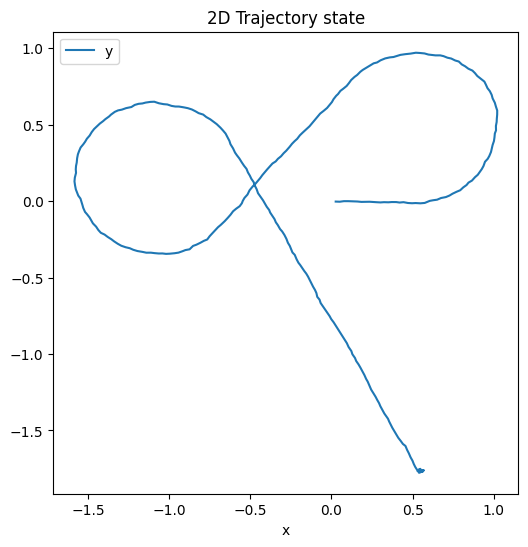

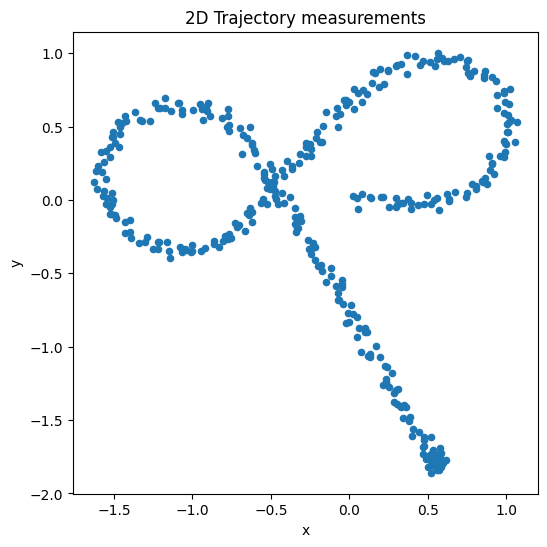

In [12]:
import pandas as pd
Xdf = pd.DataFrame(np.vstack(turtlebot_block.X),columns=["x", "y", "theta"])
Ydf = pd.DataFrame(np.vstack(turtlebot_block.Y),columns=["x", "y", "theta"])
Xdf.plot(x="x", y="y", kind="line", figsize=(6, 6), title="2D Trajectory state")
Ydf.plot(x="x", y="y", kind="scatter", figsize=(6, 6), title="2D Trajectory measurements")


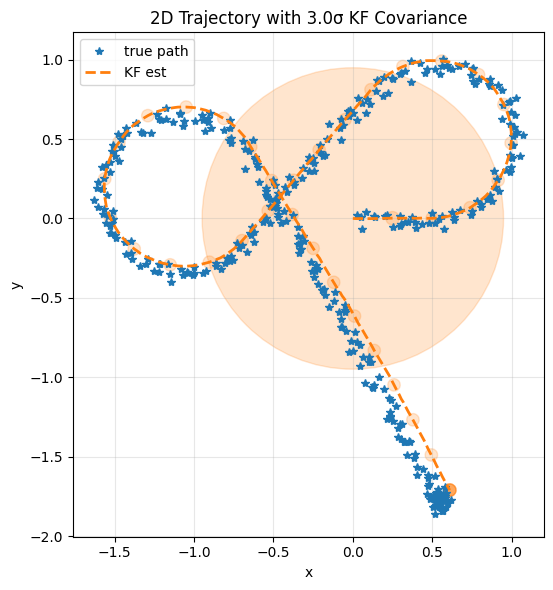

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# ----- helpers -----
def _as_flat(v):
    a = np.asarray(v)
    return a.reshape(-1)

def cov_ellipse_params(Pxy, nsig=3.0):
    """
    From 2x2 covariance Pxy, return (width, height, angle_deg) for a Matplotlib Ellipse.
    width/height are full diameters (not radii), already scaled by nsig.
    """
    # Eigen-decomposition (symmetric matrix -> real eigs)
    vals, vecs = np.linalg.eigh(Pxy)
    # Sort by descending variance
    order = np.argsort(vals)[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Major/minor axis lengths (radii): nsig * sqrt(eigenvalues)
    # Ellipse expects full width/height (diameters)
    width  = 2.0 * nsig * np.sqrt(max(vals[0], 0.0))
    height = 2.0 * nsig * np.sqrt(max(vals[1], 0.0))

    # Angle of major axis (eigvec for largest eigenvalue)
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    return width, height, angle

# ----- materialize arrays -----
# True states (T_true, 3)
Y_true = np.vstack([_as_flat(y) for y in turtlebot_block.Y])
T_true = Y_true.shape[0]

# EKF estimates
x_est = np.vstack([_as_flat(xhat) for (xhat, _) in kf_block.X])  # (T_est, n)
P_est = np.stack([Pk for (_, Pk) in kf_block.X])                 # (T_est, n, n)
T_est = x_est.shape[0]

# ----- align lengths -----
# Common case: you may have stored an initial EKF state at t=0 (making T_est = T_true or T_true+1)
if T_est == T_true + 1:
    x_est_plot = x_est[:-1]
    P_est_plot = P_est[:-1]
    T_plot = T_true
else:
    T_plot = min(T_true, T_est)
    x_est_plot = x_est[:T_plot]
    P_est_plot = P_est[:T_plot]
Y_true_plot = Y_true[:T_plot]

# ----- indices for position in state vector -----
# Change this tuple if your state order differs.
ix, iy = 0, 1

# ----- plot -----
fig, ax = plt.subplots(figsize=(6, 6))

# True path
ax.plot(Y_true_plot[:, ix], Y_true_plot[:, iy], '*',label="true path", lw=2)

# Estimated path (mean)
ax.plot(x_est_plot[:, ix], x_est_plot[:, iy], '--', label="KF est", lw=2)

# Covariance ellipses (every k steps to avoid clutter)
stride = max(1, T_plot // 40)  # ~40 ellipses max; adjust to taste
nsig = 3.0
for t in range(0, T_plot, stride):
    Px = P_est_plot[t]
    Pxy = Px[np.ix_([ix, iy], [ix, iy])]   # 2x2 subcovariance for (x,y)
    w, h, ang = cov_ellipse_params(Pxy, nsig=nsig)
    e = Ellipse(
        xy=(x_est_plot[t, ix], x_est_plot[t, iy]),
        width=w, height=h, angle=ang,
        edgecolor='C1', facecolor='C1', alpha=0.2, lw=1
    )
    ax.add_patch(e)

ax.set_aspect('equal', adjustable='box')
ax.set_title(f"2D Trajectory with {nsig}σ KF Covariance")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

# Python $\rightarrow$ ROS

Having confirmed our kf works, we want to create a ROS node that will allow our kf algorithm to interface with actual sensor data and input data from a running Turtlebot. We do this by creating a wrapper that takes in time and an input dictionary and then runs the code *we've already tested* in **Simulating General Dynamical Systems**.

In [14]:
import numpy as np
from numpy.typing import NDArray

def wrapper(tk, **inputs):
    yk = inputs.get("yk", None)
    uk = inputs.get("uk", None)
    dt = 1 / 60 # 60 Hz


    # If inputs aren’t ready yet, do nothing.
    if yk is None or uk is None:
        return {}
        
    xk_kf = kf_block.X[-1]
    xk_kf, yk_kf = Simulation.of_dynamical_system_block(
                                block=kf_block,
                                x0=xk_kf,
                                tk_in_sim=tk,
                                dt=dt,
                                func_params={
                                    "f_kf": {"yk": yk,"uk": uk,"dt": dt,"f": f_tb,"F": F_tb,"h": h_tb,"H": H_tb,"Q": Q_tb,"R": R_tb,"f_sys_type": "cti",
                                    },
                                    },
                                param_params=
                                {"xk": yk,"uk":uk,"dt":dt},
                                    )
    kf_block.X.append(xk_kf)
    kf_block.Y.append(yk_kf)

    return {"pose_kf": yk_kf}

## py2ROS and ROS2py Converters
These can be defined in advance, but I include them here for clarity and to demonstrate that these can be written as-needed and per specification.

In [15]:
from turtlesim.msg import Pose              # Import the message type published by turtlesim (/turtle1/pose)
from geometry_msgs.msg import Twist         # Import standard velocity command message (linear + angular components)
from numpy.typing import ArrayLike
def pose_ros2py(msg: Pose) -> np.ndarray:
    """
    Convert a ROS 2 turtlesim/Pose message into a NumPy array.

    turtlesim/Pose fields:
        float32 x
        float32 y
        float32 theta
        float32 linear_velocity
        float32 angular_velocity

    Returns
    -------
    np.ndarray of shape (3,)
        [x, y, theta]
    """
    return np.array(
        [msg.x, msg.y, msg.theta],
        dtype=float
    )

def twist_ros2py(msg: Twist) -> np.ndarray:
    """
    Convert a geometry_msgs/Twist message into a NumPy array.

    geometry_msgs/Twist fields:
        Vector3 linear  -> (x, y, z)  linear velocity components
        Vector3 angular -> (x, y, z)  angular velocity components

    Returns
    -------
    np.ndarray of shape (6,)
        [v_x, ω_z]
    """
    return np.array(
        [msg.linear.x, msg.angular.z],
        dtype=float
    )

def pose_py2ros(x: ArrayLike) -> Pose:
    """
    Convert [x, y, theta] into turtlesim/Pose.
    Accepts shapes (3,), (3,1), (1,3), or anything squeeze-able to >=3 elements.
    """
    arr = np.asarray(x, dtype=float).squeeze()

    # Handle common column/row vector cases
    if arr.ndim == 2 and 1 in arr.shape:
        arr = arr.reshape(-1)

    if arr.ndim != 1 or arr.size < 3:
        raise ValueError(
            f"pose_py2ros expected at least 3 elements for [x,y,theta]; "
            f"got shape {np.asarray(x).shape} after squeeze -> {arr.shape} (size={arr.size})."
        )

    msg = Pose()
    msg.x = float(arr[0])
    msg.y = float(arr[1])
    msg.theta = float(arr[2])
    msg.linear_velocity = 0.0
    msg.angular_velocity = 0.0
    return msg

## Initialize rclpy
rclpy.init() boots the ROS 2 client library in this Python process: it sets up middleware, parameters, logging, and the event loop plumbing that our node will use.

In [16]:
import rclpy
rclpy.init()

## Initialize the Node
We create a BlockROSNode that wraps our already-tested KF function so it can subscribe to real topics and publish estimates
This keeps a clean separation of concerns: ROS I/O in BlockROSNode, estimation logic in wrapper/DSBlock.

In [17]:
from pykal.block_ros_node import BlockROSNode as BlockROS

# Initialize the wrapper with initial KF state
xk = np.asarray([5.544444561004639,5.544444561004639,0]) # facing +x direction, turtlesim IC
Pk = np.array([[0.1, 0, 0],
               [0, 0.1, 0],
               [0, 0, 0.1]], dtype=float)

kf_block.X = [] # clear state from previous trials
kf_block.X.append([xk,Pk])

kf_node = BlockROS(
    node_name="kf",
    system_wrapper=wrapper,
    subscribes=[
        ("/turtle1/pose",    Pose,  pose_ros2py,  "yk"), # Topic -> Message Type -> Converter -> Name of Python argument for python_wrapper
        ("/turtle1/cmd_vel", Twist, twist_ros2py, "uk"), 
    ],
    publishes=[
        ("pose_kf", pose_py2ros, Pose, "/turtle1/pose_hat"), # Name of python_wrapper return value -> Converter -> Message Type -> Topic 
    ],
    rate_hz=60.0,
    stale_config={
        "uk": {"after": 1.0, "policy": "zero"},  # zero cmd after 1s silence (like turtlesim)
    })

[INFO] [1760551494.147292348] [kf]: [kf] subs=['/turtle1/pose', '/turtle1/cmd_vel'] pubs=['/turtle1/pose_hat'] rate=60.0 Hz; stale_default(after=None, policy=drop)


## Spin Node

In [18]:
kf_node.start()

[ROSBlock] started node='kf' pub=['/turtle1/pose_hat'] sub=['/turtle1/pose', '/turtle1/cmd_vel'] @ 60.0 Hz


## Destroy Node

In [19]:
kf_node.stop()

[ROSBlock] stopped.


# Plot Data from Experiment

In [21]:
kf_block.X

[[array([5.54444456, 5.54444456, 0.        ]),
  array([[0.1, 0. , 0. ],
         [0. , 0.1, 0. ],
         [0. , 0. , 0.1]])],
 (array([ 5.54444456,  5.54444456, -0.03333333]),
  array([[0.00099042, 0.        , 0.        ],
         [0.        , 0.00099042, 0.        ],
         [0.        , 0.        , 0.00099042]])),
 (array([ 5.54444456,  5.54444456, -0.06666667]),
  array([[0.00050583, 0.        , 0.        ],
         [0.        , 0.00050583, 0.        ],
         [0.        , 0.        , 0.00050583]])),
 (array([ 5.54444456,  5.54444456, -0.1       ]),
  array([[0.00034334, 0.        , 0.        ],
         [0.        , 0.00034334, 0.        ],
         [0.        , 0.        , 0.00034334]])),
 (array([ 5.54444456,  5.54444456, -0.13333333]),
  array([[0.00026197, 0.        , 0.        ],
         [0.        , 0.00026197, 0.        ],
         [0.        , 0.        , 0.00026197]])),
 (array([ 5.54444456,  5.54444456, -0.16666667]),
  array([[0.00021313, 0.        , 0.        ],

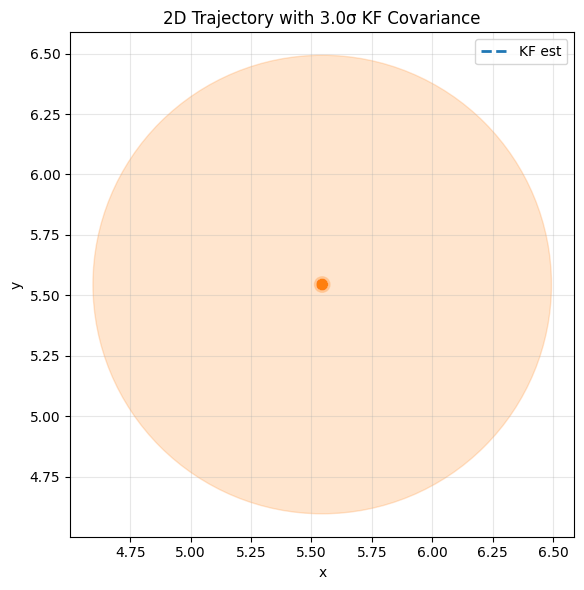

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# ----- helpers -----
def _as_flat(v):
    a = np.asarray(v)
    return a.reshape(-1)

def cov_ellipse_params(Pxy, nsig=3.0):
    """
    From 2x2 covariance Pxy, return (width, height, angle_deg) for a Matplotlib Ellipse.
    width/height are full diameters (not radii), already scaled by nsig.
    """
    # Eigen-decomposition (symmetric matrix -> real eigs)
    vals, vecs = np.linalg.eigh(Pxy)
    # Sort by descending variance
    order = np.argsort(vals)[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Major/minor axis lengths (radii): nsig * sqrt(eigenvalues)
    # Ellipse expects full width/height (diameters)
    width  = 2.0 * nsig * np.sqrt(max(vals[0], 0.0))
    height = 2.0 * nsig * np.sqrt(max(vals[1], 0.0))

    # Angle of major axis (eigvec for largest eigenvalue)
    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
    return width, height, angle

# ----- materialize arrays -----
# True states (T_true, 3)
Y_true = np.vstack([_as_flat(y) for y in turtlebot_block.Y])
T_true = Y_true.shape[0]

# EKF estimates
x_est = np.vstack([_as_flat(xhat) for (xhat, _) in kf_block.X])  # (T_est, n)
P_est = np.stack([Pk for (_, Pk) in kf_block.X])                 # (T_est, n, n)
T_est = x_est.shape[0]

# ----- align lengths -----
# Common case: you may have stored an initial EKF state at t=0 (making T_est = T_true or T_true+1)
if T_est == T_true + 1:
    x_est_plot = x_est[:-1]
    P_est_plot = P_est[:-1]
    T_plot = T_true
else:
    T_plot = min(T_true, T_est)
    x_est_plot = x_est[:T_plot]
    P_est_plot = P_est[:T_plot]
Y_true_plot = Y_true[:T_plot]

# ----- indices for position in state vector -----
# Change this tuple if your state order differs.
ix, iy = 0, 1

# ----- plot -----
fig, ax = plt.subplots(figsize=(6, 6))

# Estimated path (mean)
ax.plot(x_est_plot[:, ix], x_est_plot[:, iy], '--', label="KF est", lw=2)

# Covariance ellipses (every k steps to avoid clutter)
stride = max(1, T_plot // 40)  # ~40 ellipses max; adjust to taste
nsig = 3.0
for t in range(0, T_plot, stride):
    Px = P_est_plot[t]
    Pxy = Px[np.ix_([ix, iy], [ix, iy])]   # 2x2 subcovariance for (x,y)
    w, h, ang = cov_ellipse_params(Pxy, nsig=nsig)
    e = Ellipse(
        xy=(x_est_plot[t, ix], x_est_plot[t, iy]),
        width=w, height=h, angle=ang,
        edgecolor='C1', facecolor='C1', alpha=0.2, lw=1
    )
    ax.add_patch(e)

ax.set_aspect('equal', adjustable='box')
ax.set_title(f"2D Trajectory with {nsig}σ KF Covariance")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()